In [1]:
import tensorflow as tf

In [6]:
import tensorboard
import matplotlib.pyplot as plt

In [7]:
(train_img,train_label),(test_img,test_label) = tf.keras.datasets.cifar10.load_data()
print(f'train images', train_img.shape)

train images (50000, 32, 32, 3)


In [8]:
train_img[0].shape

(32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

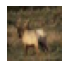

In [9]:
fig, ax = plt.subplots(figsize=(1,1))
plt.imshow(train_img[3])
plt.axis(False)

In [10]:
names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

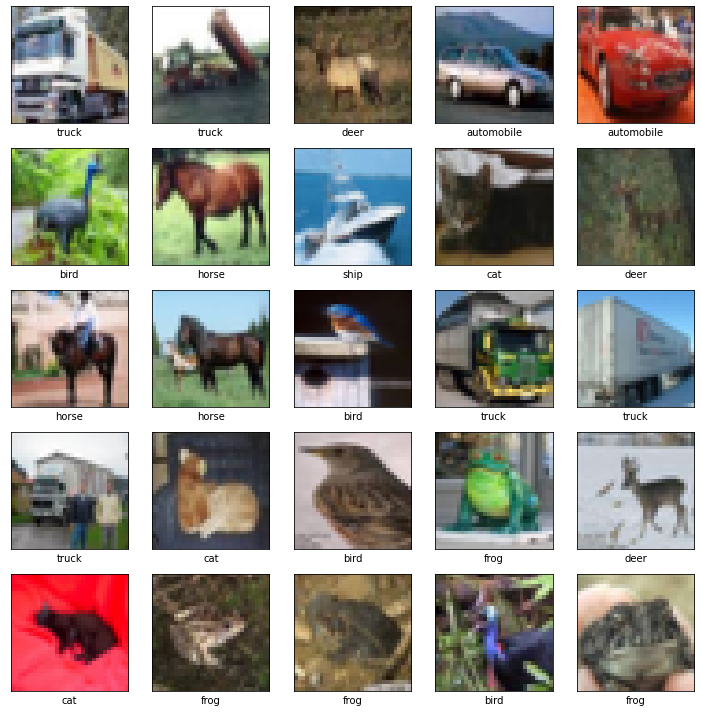

In [12]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(names[train_label[i][0]])
plt.tight_layout()
plt.show()

In [13]:
num_filter = 32
conv_kernel = (3,3)
input_shape = train_img[0].shape # (32,32,3)
maxpool_kernel = (2,2)
epochs=20

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(num_filter,conv_kernel,activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Conv2D(num_filter*2,conv_kernel,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Conv2D(num_filter*2,conv_kernel,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
stopper = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)
history = model.fit(train_img,train_label,
          epochs=epochs, validation_data=(test_img,test_label),
          callbacks=[stopper])

Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5537 - accuracy: 0.8090 - val_loss: 1.1380 - val_accuracy: 0.6694
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5418 - accuracy: 0.8124 - val_loss: 1.3091 - val_accuracy: 0.6550
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5321 - accuracy: 0.8158 - val_loss: 1.2626 - val_accuracy: 0.6553
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5196 - accuracy: 0.8191 - val_loss: 1.1878 - val_accuracy: 0.6758
Epoch 5/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5150 - accuracy: 0.8225 - val_loss: 1.2180 - val_accuracy: 0.6822
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5138 - accuracy: 0.8208 - val_loss: 1.2268 - val_accuracy: 0.6681
Epoch 7/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.4956 - accuracy: 0.8291 - val_loss: 1.2776 -

In [22]:
model.save("cifar_10.h5")

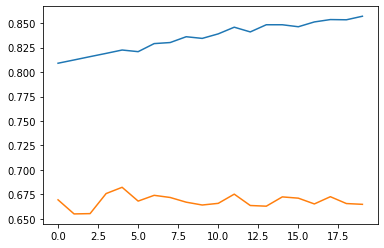

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## testing and using the model

In [24]:
model = tf.keras.models.load_model('cifar_10.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

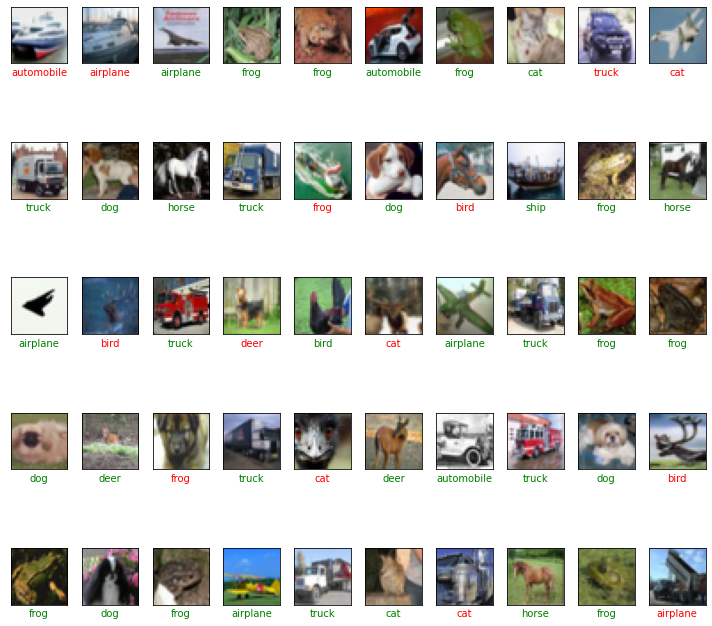

In [25]:
plt.figure(figsize=(10,10))
for i in range(1,51):
    plt.subplot(5,10,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i])
    result = model.predict(test_img[i].reshape(1,32,32,3))
    pred_label = names[result.argmax()]
    orig_label = names[test_label[i][0]]
    plt.xlabel(pred_label,color='g' if pred_label == orig_label else 'r')
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
pred_labels = model.predict(test_img)

In [28]:
pred_labels_cleaned = []
for labels in pred_labels:
    pred_labels_cleaned.append(labels.argmax())

In [29]:
pred_labels_cleaned = np.array(pred_labels_cleaned).reshape(10000,1)

In [31]:
confusion_matrix(test_label,pred_labels_cleaned)

array([[702,  24, 103,  23,  34,   8,  16,  14,  37,  39],
       [ 37, 782,  10,   8,   6,   6,  19,   9,  18, 105],
       [ 62,   9, 602,  80,  59,  65,  71,  43,   5,   4],
       [ 15,  12, 105, 507,  60, 165,  71,  45,   9,  11],
       [ 20,   2, 128,  87, 572,  34,  83,  69,   1,   4],
       [  9,   2,  70, 181,  47, 571,  32,  78,   2,   8],
       [  3,   4,  70,  77,  39,  16, 774,   9,   4,   4],
       [ 16,   6,  53,  53,  73,  64,  17, 702,   5,  11],
       [153,  35,  27,  29,  20,   7,  12,   5, 663,  49],
       [ 36,  77,  18,  20,  13,   5,  17,  14,  27, 773]])

In [33]:
print(classification_report(test_label,pred_labels_cleaned))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1000
           1       0.82      0.78      0.80      1000
           2       0.51      0.60      0.55      1000
           3       0.48      0.51      0.49      1000
           4       0.62      0.57      0.59      1000
           5       0.61      0.57      0.59      1000
           6       0.70      0.77      0.73      1000
           7       0.71      0.70      0.71      1000
           8       0.86      0.66      0.75      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.67     10000
weighted avg       0.67      0.66      0.67     10000



In [34]:
model.input_shape

(None, 32, 32, 3)

In [44]:
from PIL import Image

In [45]:
img = Image.open('ship.jpg')
img.size

(1540, 800)

In [46]:
input_img = img.resize((32,32))

In [47]:
# convert in numpy matrix
input_img = np.array(input_img)
# reshape it for passing it as a single input
input_img = np.array([input_img])

In [48]:
input_img.shape

(1, 32, 32, 3)

In [49]:
result = model.predict(input_img)
print(names[result.argmax()])

ship


Text(0.5, 1.0, 'ship')

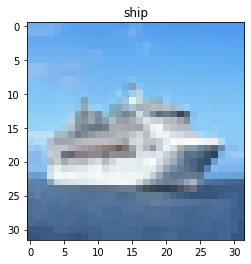

In [50]:
plt.imshow(input_img[0])
plt.title(names[result.argmax()])

In [51]:
def predict(img_path , model, show_img=True):
    img = Image.open(img_path)
    # resize the image into input shape for  model
    input_img = img.resize((32,32))
    # convert in numpy matrix
    input_img = np.array(input_img)
    # reshape it for passing it as a single input
    input_img = np.array([input_img])
    result = model.predict(input_img)
    output = names[result.argmax()]
    if show_img:
        plt.imshow(input_img[0])
        plt.title(output)
        plt.show()
    return output

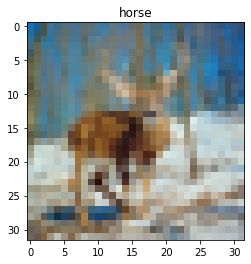

'horse'

In [52]:
predict('deer.jpg',model)